## ASIGNMENT DAY 17 EXPLORATORY DATA ANALYST
1. PERFORM STANDARD DATA CLEANSING
   - MISSING VALUES
   - DUPLICATE VALUES
2. PERFORM STANDARD EDA WITH RICH INTERPRETATION 
   - STATISTICAL SUMMARY OF COLUMNS
   - UNIVARIATE ANALYSIS
   - MULTIVARIATE ANALYSIS
3. PERFORM DEEP-DIVE EXPLORATION
   - ASK MINIMUM 2 QUESTIONS
   - AT LEAST 1 OF THEM SHOULD INVOLVE GROUP-BY AGGREGATION

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# READ DATASET
telco = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# exclude row with TotalCharges column contain white space
telco = telco.loc[-telco['TotalCharges'].str.contains(' ')]

karena ditemukan adanya whitespace pada kolom TotalCharge di dataset dan tidak bisa di detect dengan missing value, kita keluarkan whitespace terlebih dahulu.

In [ ]:
# transorm TotalCharges col to float
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors ='coerce')

data type pada TotalCharge tidak sesuai, sehingga perlu kita rubah data type dari object / categoric menjadi numeric.



## 1. PERFORM STANDARD DATA CLEANSING

Missing Value

In [ ]:
# check the data type
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


melakukan pengecekan tipe data pada setiap kolom, hasilnya terdapat


*   4 tipe data numerik
*   17 tipe data categorical

*   21 columns dengan 7032 row setelah dilakukan exclude pada whitespace


In [ ]:
# CHECK MISSING VALUE
telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

setelah dilakukan pengecekan missing value pada setiap kolom, outputnya tidak ditemukan adanya missing value

DUPLICATE DATA CHECK

In [ ]:
# number of duplicate data
telco.duplicated().sum()

0

tidak ditemukan adanya data duplicate

## 2. PERFORM STANDARD EDA WITH RICH INTERPRETATION

# STATISTICAL SUMMARY OF COLUMNS

In [ ]:
# grup nama kolom berdasarkan kelompok informasi
demograf = ['gender', 'Partner', 'Dependents']
service1 = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']
service2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
acc_info =  ['Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
numeric = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

PEMBAGIAN KELOMPOK BERDASARKAN INFORMASINYA
demograf untuk kolom dengan informasi demografi user

*   `demograf` untuk kolom dengan informasi demografi user
*   `service1` dan `service2` untuk kolom dengan informasi layanan yang digunakan user
*   `acc_info` untuk kolom dengan informasi akun user
*   `numeric` untuk kolom dengan tipe data numerik 


In [ ]:
# numerical statistical summary
telco[numeric].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observasi : 
* `SeniorCitizen` kolom adalah boolean kolom, karna valuenya 0 dan 1
* Secara keseluruhan, perbandingan hasil minimum dan maximum terlihat masuk akal untuk setiap kolom, kecuali pada kolom `TotalCharge` yg memiliki perbandingan cukup jauh 
* 
Mean ~ 50% (Median) in `gre_score`, `toefl_score`, `recomendation_strength`, and `gpa` ccolumn, indicating somewhat a symmetrical distribution
* Mean > 50% (Median) in `univ_ranking` column, indicating both are slight positively skewed distribution
* Mean < 50% (Median) in `motiv_letter_strength` column, indicating both are slight negatively skewed distribution

# Categorical Statistical Summary

In [ ]:
# describe method on demograf 
telco[demograf].describe()

,gender,Partner,Dependents
count,7032,7032,7032
unique,2,2,2
top,Male,No,No
freq,3549,3639,4933


Observasi


*   `gender`, `Partner`, `Dependents` memiliki 2 hasil unik `gender` male dan female. dan `Partner`, `Dependents` Yes, No




In [ ]:
# describe method on service1 
telco[service1].describe()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup
count,7032,7032,7032,7032,7032
unique,2,3,3,3,3
top,Yes,No,Fiber optic,No,No
freq,6352,3385,3096,3497,3087


In [ ]:
# describe method on service2 
telco[service2].describe()

,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,7032,7032,7032,7032
unique,3,3,3,3
top,No,No,No,No
freq,3094,3472,2809,2781


In [ ]:
# describe method on acc_info 
telco[acc_info].describe()

,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032
unique,3,2,4,2
top,Month-to-month,Yes,Electronic check,No
freq,3875,4168,2365,5163


# UNIVARIATE ANALYSIS

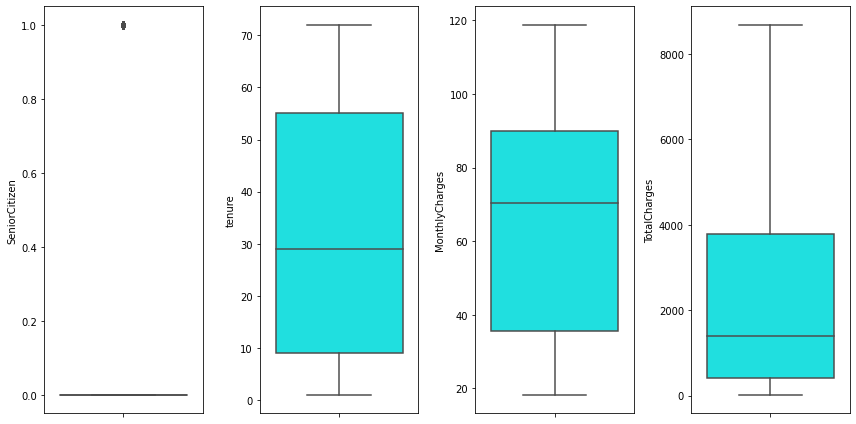

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numeric
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=telco[features[i]], color='cyan')
    plt.tight_layout()

tidak ada outlier dalam setiap kolom 

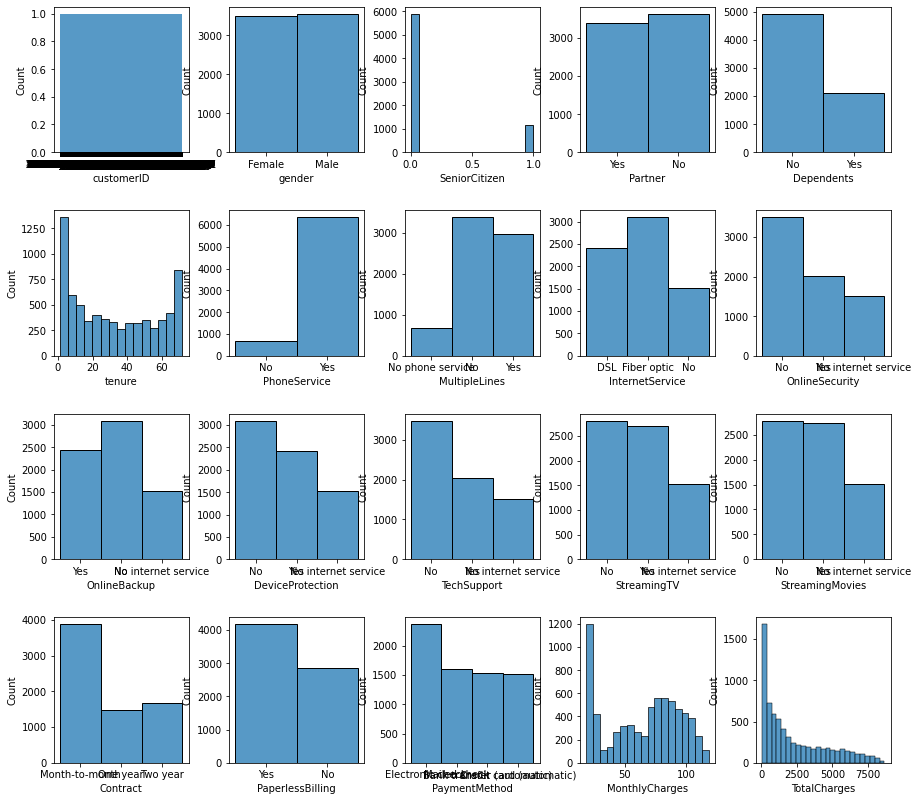

In [ ]:
fig,ax = plt.subplots(4, 5, figsize=(15,12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1,wspace=0.3, hspace=0.4)
for variable, subplot in zip(telco.columns, ax.flatten()):
  sns.histplot(telco[variable], ax=subplot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

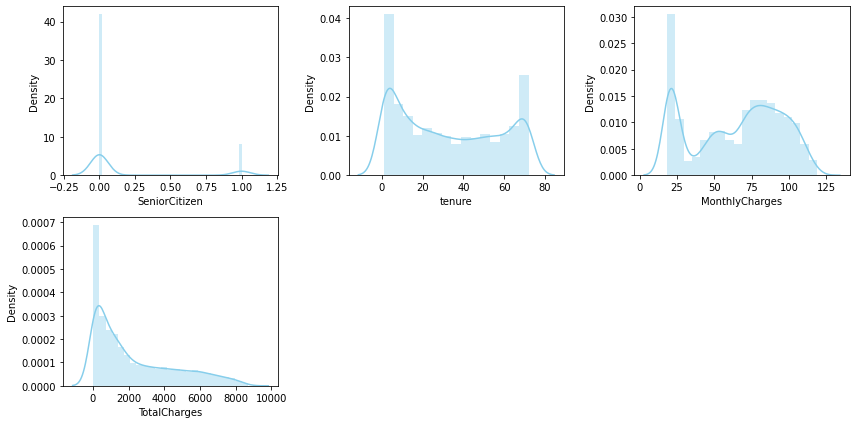

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numeric
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=telco[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

# MULTIVARIATE ANALYSYS

# apakah gender, partner, dependents memiliki pengaruh pada customer dalam melakukan churn?

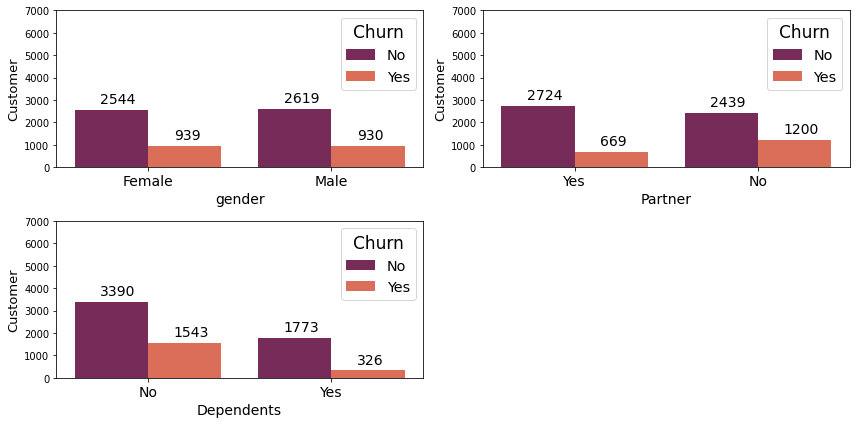

In [ ]:
# APAKAH FILTER DEMOGRAF BERPENGARUH DALAM CHURN 
plt.figure(figsize=(12,6))

for i,col in enumerate(demograf):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = telco, x = col, hue="Churn", palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Customer", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)
    
    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.14, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

*  `Gender`: Hampir tidak ada perbedaan dalam persentase churn antara pria dan wanita;
*  `Partner`: Customer yang tidak memiliki partner lebih mungkin untuk churn daripada customer dengan yang memiliki partner;
*  `Dependents`: Customer yang tidak memiliki tanggungan lebih besar memiliki kemungkinan untuk churn.

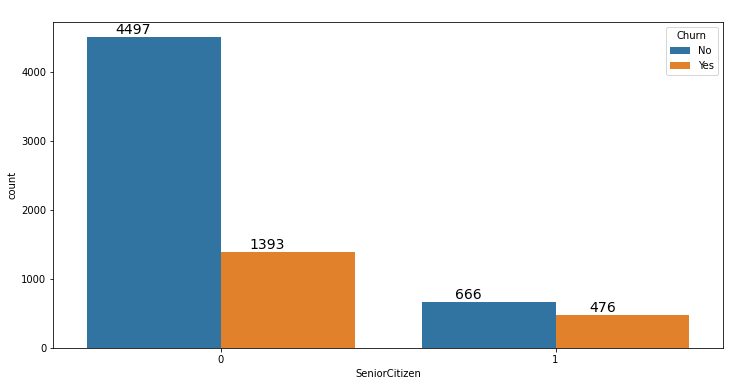

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=telco,
            x='SeniorCitizen',
            hue='Churn')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.14, p.get_height()+50), ha= 'center', color='black', fontsize= 14)
plt.show()

dilihat dari hasil visualisasi `SeniorCitizen` terdapat 476 customer dengan usia diatas 65 yang kemungkinan melakukan churn. Sedangkan customer dengan usia dibawah 65 terdapat 1393 customer yang kemungkinan melakukan churn

# Melihat apakah filter service1 memiliki pengaruh dalam melakukan churn?

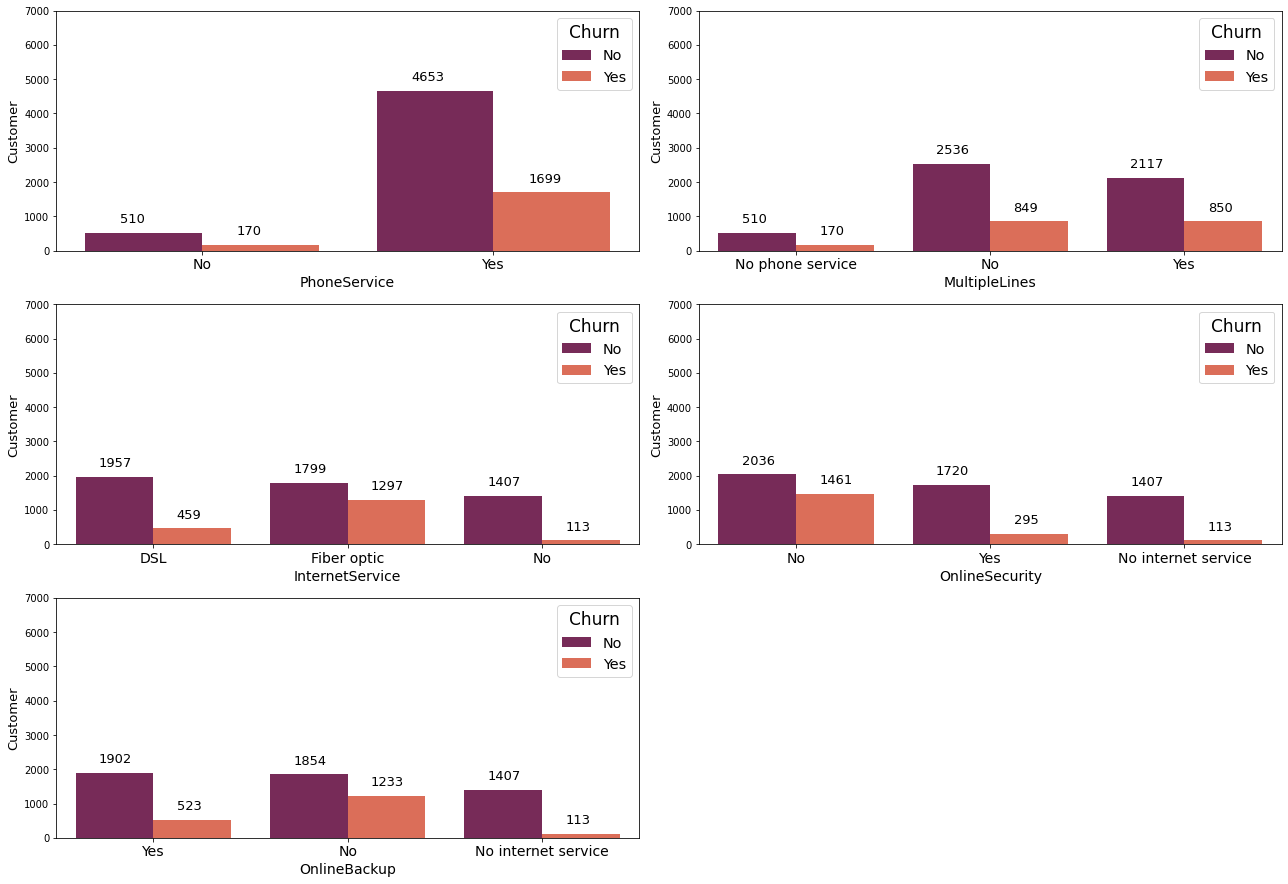

In [ ]:
plt.figure(figsize=(18,20))

for i,col in enumerate(service1):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = telco, x = col, hue="Churn", palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Customer", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)
    
    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+300), fontsize= 13)

plt.tight_layout()

plt.show()

setelah dilakukan visualisasi di dapatkan hasil pengguna `InternetService` yang paling banyak kemungkinan melakukan churn adalah fiber optic. 


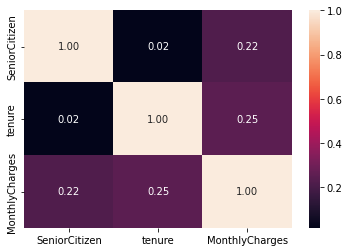

In [ ]:
correlation = telco.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

# 3 PERFORM DEEP-DIVE EXPLORATION

# Bagaimana pengaruh partner dan dependents terhadap churn



In [ ]:
telco.groupby(['Churn', 'Partner','Dependents']).agg(
    total_user = ('customerID', 'count')
)

total_user
Churn Partner Dependents            
No    No      No                2157
              Yes                284
      Yes     No                1233
              Yes               1500
Yes   No      No                1123
              Yes                 77
      Yes     No                 420
              Yes                249

setelah dilakukan analisis menggunakan groupby pada kolom `Partner` dan `Dependents` terhadap churn didapatkan bahwa terdapat 1123 customer yang tidak memiliki partner dan tidak memiliki dependents yang memilih churn

# Siapa 10 orang teratas yg paling loyal 

In [ ]:
# group by aggregation
top10_cust = (telco
            .groupby('customerID')
            .agg(total_spend=('TotalCharges','sum'))  
            .reset_index()
            .sort_values('total_spend',ascending=False)
            .head(10)
            )

top10_cust

,customerID,total_spend
6421,9093-FPDLG,999.9
3162,4536-PLEQY,999.8
4173,5899-MQZZL,999.45
4298,6051-PTVNS,998.1
5868,8249-THVEC,997.75
4483,6328-ZPBGN,997.65
5187,7297-DVYGA,996.95
4429,6243-OZGFH,996.85
325,0484-JPBRU,996.45
2065,2971-SGAFL,995.35


# bagaimana paymentmethod dan Contract dalam kemungkinan churn?

---



In [ ]:
telco.groupby(['Churn', 'PaymentMethod','Contract']).agg(
    total_user = ('customerID', 'count')
)

total_user
Churn PaymentMethod             Contract                  
No    Bank transfer (automatic) Month-to-month         388
                                One year               353
                                Two year               543
      Credit card (automatic)   Month-to-month         365
                                One year               357
                                Two year               567
      Electronic check          Month-to-month         856
                                One year               283
                                Two year               155
      Mailed check              Month-to-month         611
                                One year               313
                                Two year               372
Yes   Bank transfer (automatic) Month-to-month         201
                                One year                38
                                Two year                19
      Credit card (automatic)   Month-to-month         178
                                One year                41
                                Two year                13
      Electronic check          Month-to-month         994
                                One year                64
                                Two year                13
      Mailed check              Month-to-month         282
                                One year                23
                                Two year                 3

setelah dilakukan groupby antara kolom `PaymentMethod` dan `Contract` dapat dilihat terdapat customer dengan electronic check dengan contract month-to month lebih banyak memutuskan untuk churn dibandingkan dengan yang tidak churn







# bagaimana hubungan Metode Pembayaran dengan Internet Service pada Churn




In [ ]:
telco.groupby(['Churn','PaymentMethod','InternetService']).agg(
    total_user = ('customerID', 'count')
)

total_user
Churn PaymentMethod             InternetService            
No    Bank transfer (automatic) DSL                     511
                                Fiber optic             459
                                No                      314
      Credit card (automatic)   DSL                     521
                                Fiber optic             446
                                No                      322
      Electronic check          DSL                     441
                                Fiber optic             746
                                No                      107
      Mailed check              DSL                     484
                                Fiber optic             148
                                No                      664
Yes   Bank transfer (automatic) DSL                      53
                                Fiber optic             187
                                No                       18
      Credit card (automatic)   DSL                      72
                                Fiber optic             151
                                No                        9
      Electronic check          DSL                     207
                                Fiber optic             849
                                No                       15
      Mailed check              DSL                     127
                                Fiber optic             110
                                No                       71

dapat disimpulkan bahwa yang metode pembayaran dengan electronic check pengguna fiber optic lebih banyak yang memilih churn dibandingkan yang bertahan.

kesimpulan

*   customer yang metode pembayaran dengan electronic check dan contract month to month lebih banyak yang memutuskan untuk churn dibandingkan dengan metode pembayaran lain yang terhitung masih lumayan tinggi, kemungkinan dengan metode pembayaran yang tidak otomatis setiap bulannya membuat customer merasa kurang efektif, karna harus melakukan pengecekan dan pembayar setiap bulannya. 

*   saran : melakukan survei untuk metode pembayaran dan kontrak dalam menggunakan layanan, sehingga tingkat terjadinya churn bisa menurun.

